In [1]:
import glob
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

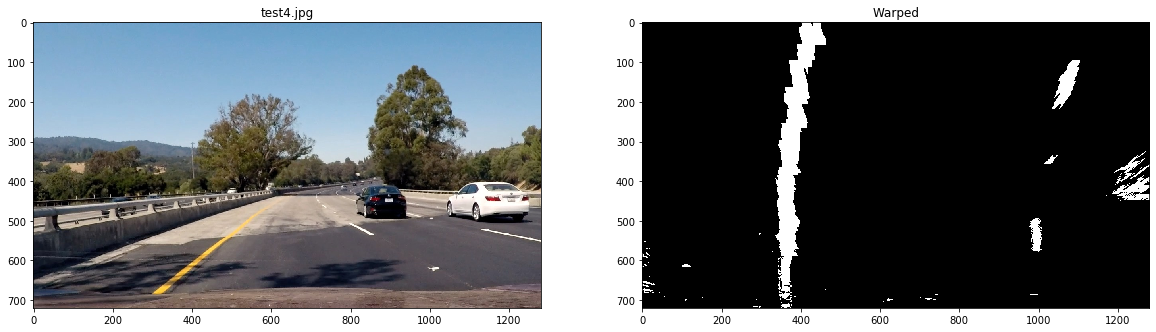

In [2]:
cameraData = utils.loadCameraData()

# Test images to create the color threasholds
test_image = cv2.imread("test_images/test4.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

warped = utils.find_edges_warped(test_image, cameraData)

utils.plot_side_by_side(test_image, warped, "test4.jpg", "Warped", gray=True)

In [3]:
def hist(img):
    img = img/255.0
    # img.shape = (y, x) 720, 1280
    bottom_half = img[img.shape[0]//2:, :]
    
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

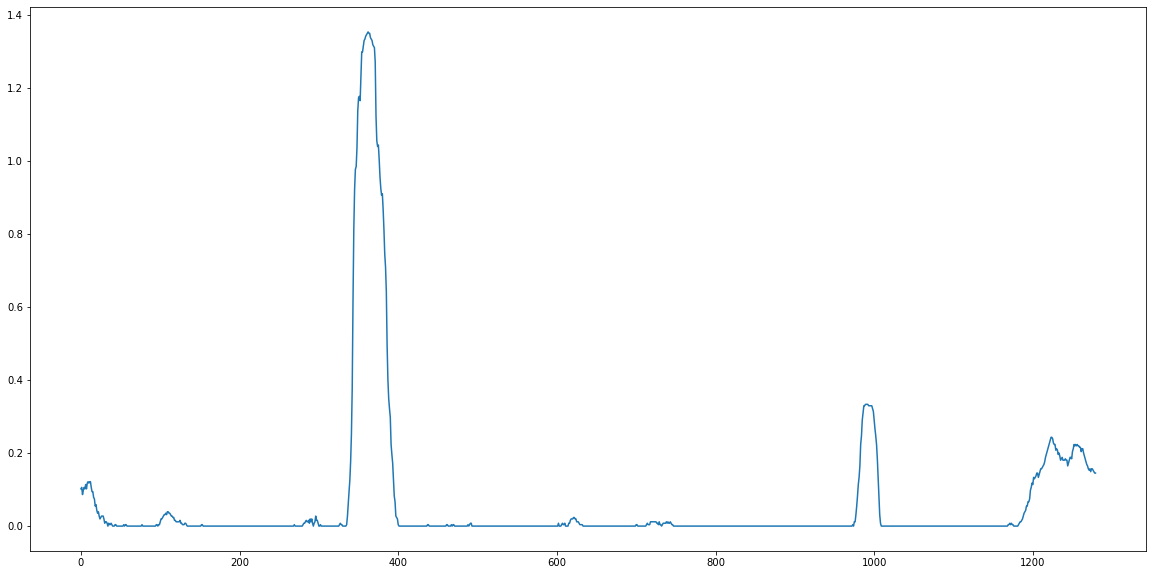

In [4]:
histogram = hist(warped)

plt.figure(figsize=(20,10))
plt.plot(histogram)
plt.show()

In [5]:
midpoint = np.int(histogram.shape[0]//2)

left_lane = {
    'base_point': np.argmax(histogram[:midpoint]),
}

right_lane = {
    'base_point': np.argmax(histogram[midpoint:]) + midpoint
}

# HYPERPARAMETERS
# Choose the number of sliding windows
number_windows = 10
# Height of windows - based on number_windows above and image shape
window_height = np.int(warped.shape[0]//number_windows)
# Set the width of the windows +/- margin
window_margin = 100
# Set the minimum number of pixels that must be found. If not found, the window is recentered
min_num_pix = 50

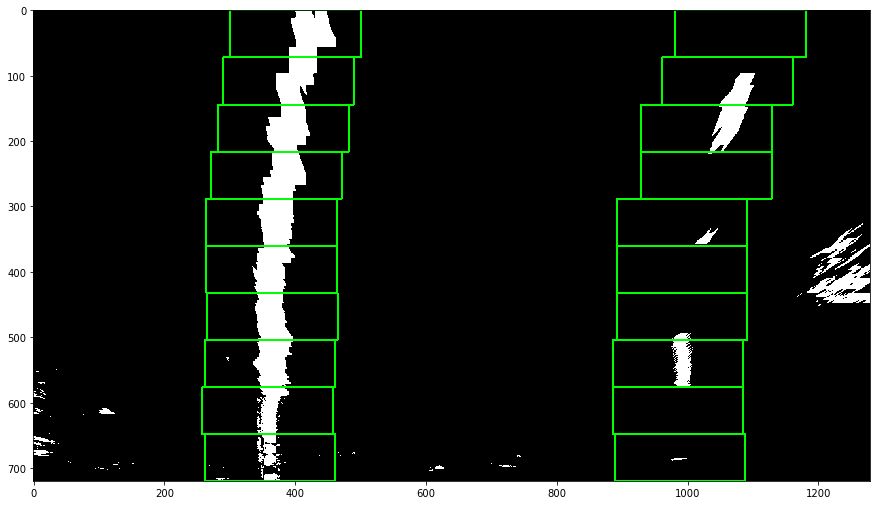

In [6]:
# Identify the x and y positions of all nonzero (i.e. activated) pixels in the image
non_zero   = warped.nonzero()
non_zero_y = np.array(non_zero[0])
non_zero_x = np.array(non_zero[1])

# Current positions to be updated later for each window in nwindows
left_lane['current_point']  = left_lane['base_point']
right_lane['current_point'] = right_lane['base_point']

# Create empty lists to receive left and right lane pixel indices
left_lane['indices'] = []
right_lane['indices'] = []

# Create an output image with 3 dimensions with the binary warped image, to draw the windows and lane line
out_img = np.dstack((warped, warped, warped))*255

# Step through the windows one by one
for idx_window in range(number_windows):
    # Identify window boundaries in x and y (and right and left)
    left_lane['window'] = {
        'top':    warped.shape[0] - ((idx_window+1) * window_height),
        'bottom': warped.shape[0] - (idx_window * window_height),
        'left':   left_lane['current_point'] - window_margin,
        'right':  left_lane['current_point'] + window_margin
    }
    right_lane['window'] = {
        'top':    warped.shape[0] - ((idx_window+1) * window_height),
        'bottom': warped.shape[0] - (idx_window * window_height),
        'left':   right_lane['current_point'] - window_margin,
        'right':  right_lane['current_point'] + window_margin,
    }

    # Draw the windows on the visualization image
    cv2.rectangle(out_img,
                  (right_lane['window']['left'], right_lane['window']['bottom']),
                  (right_lane['window']['right'], right_lane['window']['top']),
                  (0, 255, 0), 
                  2)
    
    cv2.rectangle(out_img,
                  (left_lane['window']['left'], left_lane['window']['bottom']),
                  (left_lane['window']['right'], left_lane['window']['top']),
                  (0, 255, 0), 
                  2)
    
    # Identify the nonzero pixels in x and y within the window #
    left_lane['good_indices'] = (
        (non_zero_y < left_lane['window']['bottom']) &
        (non_zero_y >=  left_lane['window']['top'])    &
        (non_zero_x >= left_lane['window']['left'])   &
        (non_zero_x <  left_lane['window']['right'])
    ).nonzero()[0]
    
    right_lane['good_indices'] = (
        (non_zero_y < right_lane['window']['bottom']) &
        (non_zero_y >=  right_lane['window']['top'])    &
        (non_zero_x >= right_lane['window']['left'])   &
        (non_zero_x <  right_lane['window']['right'])
    ).nonzero()[0]

    #print("left: {0} right: {1}".format(len(left_lane['good_indices']), len(right_lane['good_indices']),))
    
    left_lane['indices'].append(left_lane['good_indices'])
    right_lane['indices'].append(right_lane['good_indices'])
    
    
    if len(left_lane['good_indices']) > min_num_pix:
        left_lane['current_point']  = np.int(np.mean(non_zero_x[left_lane['good_indices']]))
    if len(right_lane['good_indices']) > min_num_pix:        
        right_lane['current_point'] = np.int(np.mean(non_zero_x[right_lane['good_indices']]))

# Ideia: Salvar current_point em cada iteração e usar para plotar a reta
#left_lane['x']  = non_zero_x[left_lane['indices']]
#left_lane['y']  = 
#right_lane['x'] =
#right_lane['y'] = 

utils.plot_image(out_img)

In [9]:
non_zero_x[left_lane['indices']]

c:\users\rodri\miniconda3\envs\sdc\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: too many indices for array